In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set() # use seaborn plotting style
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
data = pd.read_csv('files/new_categ_dropped.csv')
data

,text,category
0,Повторная отправка Рецензия Гаршиной.doc Добры...,рецензирование
1,Re: Шаблон рецензии (новый) Спасибо.Нечаев.,другое
2,RE: статья Вестник САИТ Рецензия Рецензия Толс...,рецензирование
3,RE: статья для рецензирования рецензия_на_Проб...,рецензирование
4,RE: рецензия на статью Рецензия Толстоброва на...,рецензирование
...,...,...
820,Re: статья на рецензию Рецензии Сагдатуллина А...,рецензирование
821,"статья Рис1.docx,Рис2.docx,Статья .doc Здравст...",вопросы
822,Re: Королев= ответы на замечания рецензента От...,рецензирование
823,"Re: Конденсированные среды Добрый день, Викто...",другое


In [5]:
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

In [6]:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

In [7]:
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'ясен', 'ясно', 'яшина'], dtype=object)

In [43]:
X_vectorized

<825x11817 sparse matrix of type '<class 'numpy.float64'>'
	with 71866 stored elements in Compressed Sparse Row format>

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

## Наивный Байес

In [81]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [82]:
predictions = nb_classifier.predict(X_test)

In [83]:
accuracy = accuracy_score(y_test, predictions)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.67


In [64]:
input_text = "здравствуйте редакция журнала «вестник вгу» прошу разместить статью в вашем журнале с уважением алдабаева "

# Преобразование входного текста в матрицу частот слов с использованием того же объекта vectorizer
input_text_vectorized = vectorizer.transform([input_text])

# Предсказание категории для вводного текста
predicted_category = nb_classifier.predict(input_text_vectorized)

print("Предсказанная категория:", predicted_category[0])

Предсказанная категория: подача статьи


In [65]:
nb_classifier.classes_

array(['вопросы', 'готово к публикации', 'доработка', 'другое',
       'отклонена', 'подача статьи', 'проверка статьи', 'рецензирование'],
      dtype='<U19')

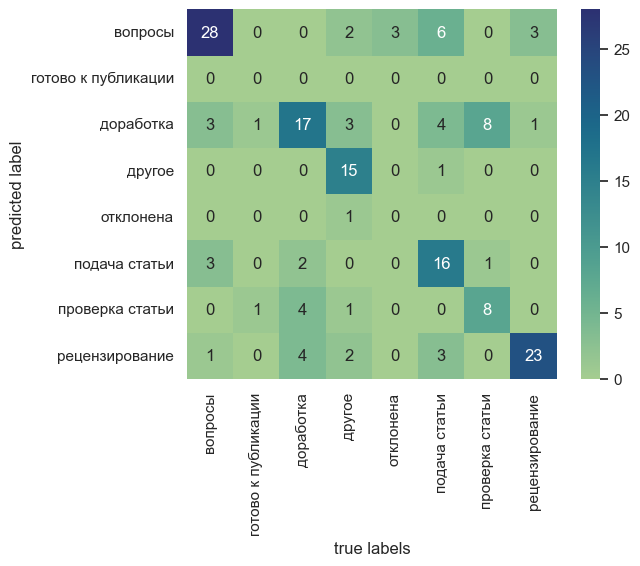

Accuracy: 0.6484848484848484


In [66]:
class_labels = nb_classifier.classes_
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels=np.unique(y),yticklabels=np.unique(y), cmap="crest")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()
print("Accuracy: {}".format(accuracy_score(y_test, predictions)))

## KNN

In [11]:
le = preprocessing.LabelEncoder()
label=le.fit_transform(y)

In [13]:
# Applying k = 3, default Minkowski distance metrics
model = KNeighborsClassifier(n_neighbors=3)
# Training the classifier
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [14]:
y_pred = model.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.58


### SVM

In [36]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC()

In [37]:
y_pred = svm.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.65


In [46]:
unique_labels = np.unique(y)
unique_labels

array(['вопросы', 'готово к публикации', 'доработка', 'другое',
       'отклонена', 'подача статьи', 'проверка статьи', 'рецензирование'],
      dtype=object)

## Деревья решений

In [9]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.56


In [12]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("dec_tree") 

'dec_tree.pdf'

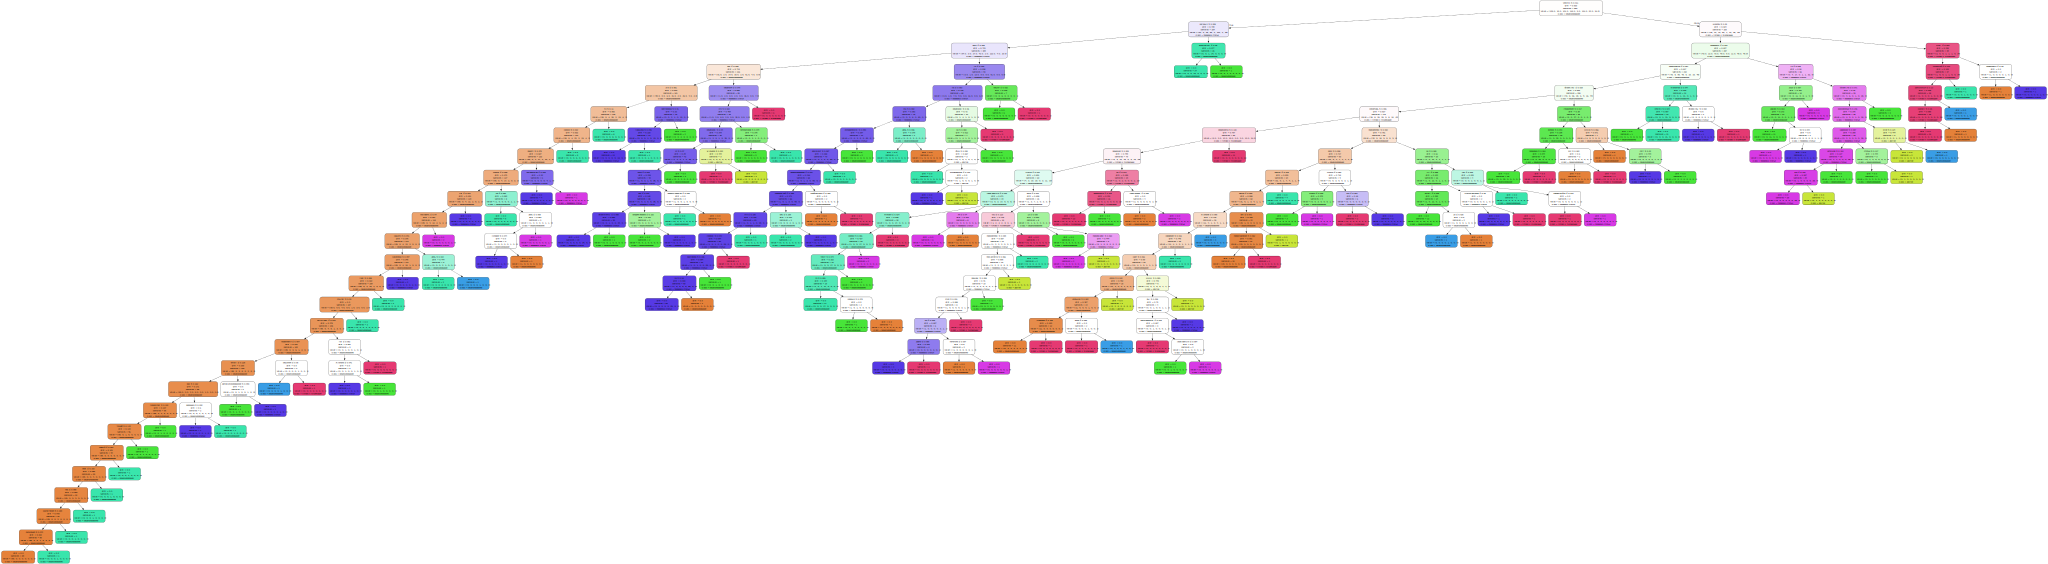

In [15]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                      feature_names=vectorizer.get_feature_names_out(),  
                      class_names=y,  
                     filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Логистическая регрессия

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [17]:
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели: {:.2f}".format(accuracy))

Точность модели: 0.67


## Визуализация

In [ ]:
import itertools
from nltk import sent_tokenize
def cooccurrence(text, cast):
 """
 Принимает на входе словарь text с главами {название: текст}
 и cast — список имен персонажей, разделенных запятыми.
 Возвращает словарь счетчиков совхождений для всех возможных
 пар имен.
 """
 possible_pairs = list(itertools.combinations(cast, 2))
 cooccurring = dict.fromkeys(possible_pairs, 0)
 for title, chapter in text['chapters'].items():
 for sent in sent_tokenize(chapter):
 for pair in possible_pairs:
 if pair[0] in sent and pair[1] in sent:
 cooccurring[pair] + = 1
 return cooccurring
 :param text: 
 :param cast: 
 :return: 


In [ ]:
import json
import codecs
import networkx as nx
import matplotlib.pyplot as plt
with codecs.open('oz.json', 'r', 'utf-8-sig') as data:
 text = json.load(data)
 cast = text['cast']
 G = nx.Graph()
 G.name = "The Social Network of Oz"
 pairs = cooccurrence(text, cast)
 for pair, wgt in pairs.items():
 if wgt>0:
 G.add_edge(pair[0], pair[1], weight = wgt)
 # Поместить Dorothy в центр
 D = nx.ego_graph(G, "Dorothy")
 edges, weights = zip(*nx.get_edge_attributes(D, "weight").items())
 # Добавить узлы, поместить в узлы, менее тесно связанные с Dorothy
 pos = nx.spring_layout(D, k = 5, iterations = 40)
 nx.draw(D, pos, node_color = "gold", node_size = 50, edgelist = edges,
 width = .5, edge_color = "orange", with_labels = True, font_
size = 12)
 plt.show()